In [1]:
# configuration project directory
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.chdir(project_root)

if project_root not in sys.path:
    sys.path.append(project_root)

print("Current working directory:", os.getcwd())

Current working directory: c:\Users\ibnum\Desktop\Material Learning\ML Project


In [2]:
# import modules needed
import matplotlib.pyplot as plt
import seaborn as sns
from src.config import config
from src.data.load_data import read_data, clean_data, replace_target

In [3]:
# load the data
df = read_data(input_data=config.DATA_PATH)

# clean the data duplicates
df = clean_data(raw_data=df)

df.head()

Data shape: (7043, 21)

Cleaning data process. . .
Duplicates found in data: 22
Data shape after dropping duplicates: (7021, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# replace churn categories (Yes: 1, No: 0)
df = replace_target(cleaned_data=df)
df


Replacing target categories. . .
Target categories before replace: ['No' 'Yes']
Target categories after replace: [0 1]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [5]:
# check missing values
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data has already well imputed.

In [6]:
# check the proportion of each feature

# categorical data
for row in config.CATEGORICAL_COLS:
    print(f'{df[row].value_counts(normalize=True)}\n')

gender
Male      0.504344
Female    0.495656
Name: proportion, dtype: float64

SeniorCitizen
0    0.837488
1    0.162512
Name: proportion, dtype: float64

Partner
No     0.515454
Yes    0.484546
Name: proportion, dtype: float64

Dependents
No     0.699473
Yes    0.300527
Name: proportion, dtype: float64

PhoneService
Yes    0.902863
No     0.097137
Name: proportion, dtype: float64

MultipleLines
No                  0.479704
Yes                 0.423159
No phone service    0.097137
Name: proportion, dtype: float64

InternetService
Fiber optic    0.440108
DSL            0.344538
No             0.215354
Name: proportion, dtype: float64

OnlineSecurity
No                     0.497080
Yes                    0.287566
No internet service    0.215354
Name: proportion, dtype: float64

OnlineBackup
No                     0.438684
Yes                    0.345962
No internet service    0.215354
Name: proportion, dtype: float64

DeviceProtection
No                     0.439681
Yes                  

The values of each category column is already decently distributed. However, our target column (Churn) contains slightly imbalanced data proportion. Later, we will be applying SMOTE to compensate the 'churn' category in ideal proportion.

In [7]:
for row in config.NUMERICAL_COLS:
    print(f'{df[row].value_counts(normalize=True)}\n')

tenure
1     0.084176
72    0.051560
2     0.033898
3     0.028486
4     0.025068
        ...   
28    0.008119
39    0.007976
44    0.007264
36    0.007121
0     0.001567
Name: proportion, Length: 73, dtype: float64

MonthlyCharges
20.05     0.008403
19.85     0.006409
19.95     0.006267
19.90     0.006124
19.70     0.006124
            ...   
44.20     0.000142
63.10     0.000142
108.35    0.000142
72.00     0.000142
43.05     0.000142
Name: proportion, Length: 1585, dtype: float64

TotalCharges
          0.001567
19.75     0.001282
20.2      0.001139
19.65     0.000997
19.9      0.000997
            ...   
1990.5    0.000142
7362.9    0.000142
346.45    0.000142
306.6     0.000142
108.15    0.000142
Name: proportion, Length: 6531, dtype: float64



In [8]:
# take a look on TotalCharges
df['TotalCharges'].value_counts(normalize=True)

TotalCharges
          0.001567
19.75     0.001282
20.2      0.001139
19.65     0.000997
19.9      0.000997
            ...   
1990.5    0.000142
7362.9    0.000142
346.45    0.000142
306.6     0.000142
108.15    0.000142
Name: proportion, Length: 6531, dtype: float64

We clearly able to see that TotalCharges column is in object data type, which I prefer the data type should be in float64. 

In [9]:
empty_string_charges = df[df['TotalCharges'].str.strip() == '']
print(f'Total empty string on TotalCharges: {len(empty_string_charges)}')
empty_string_charges

Total empty string on TotalCharges: 11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


Apparently there are 11 rows in TotalCharges column with the string value of ' ', so we can't directly cast it into number data types. Since its only 11 rows, I don't see the urgency to keep this data in the dataframe, so I decide to drop this data. Then, I will cast the data type into float64

In [10]:
# data shape check before dropping
print('df shape before:', df.shape)
print('TotalCharges df type before:', df['TotalCharges'].dtype)

# drop the empty string
drop_index = [i for i in empty_string_charges.index]

df.drop(index=drop_index, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

# sanity check after dropping
print('\ndf shape after dropping:', df.shape)
print('TotalCharges df type after:', df['TotalCharges'].dtype)

df shape before: (7021, 20)
TotalCharges df type before: object

df shape after dropping: (7010, 20)
TotalCharges df type after: float64


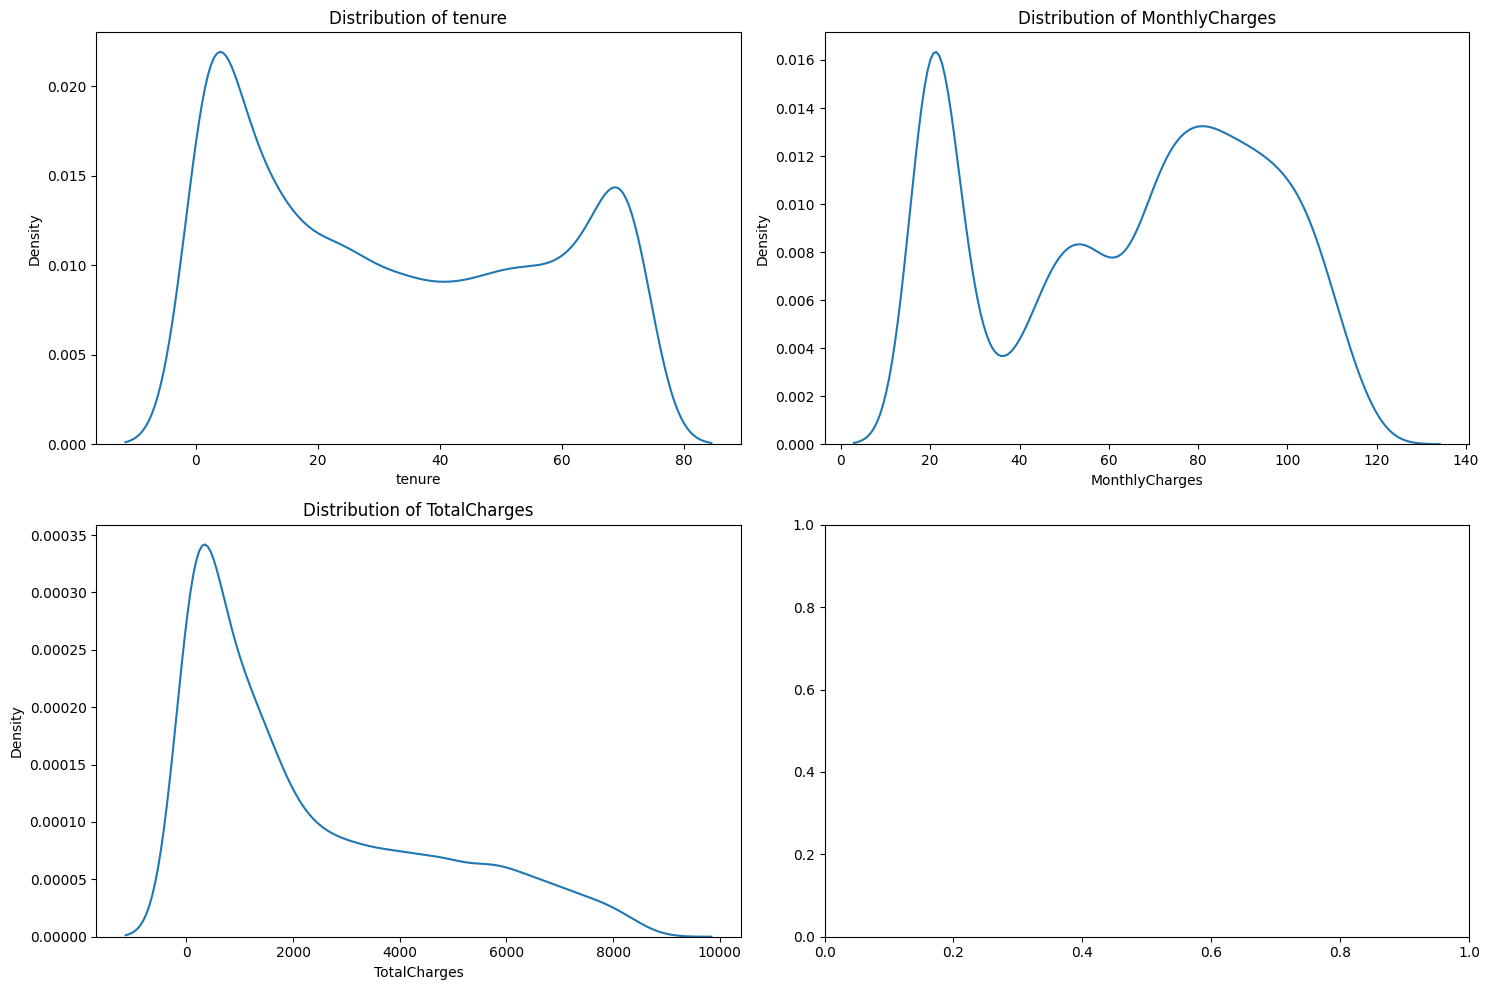

In [11]:
# plotting the numerical column distribution
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
axes = ax.flatten()

for i, col in enumerate(config.NUMERICAL_COLS):
    sns.kdeplot(df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

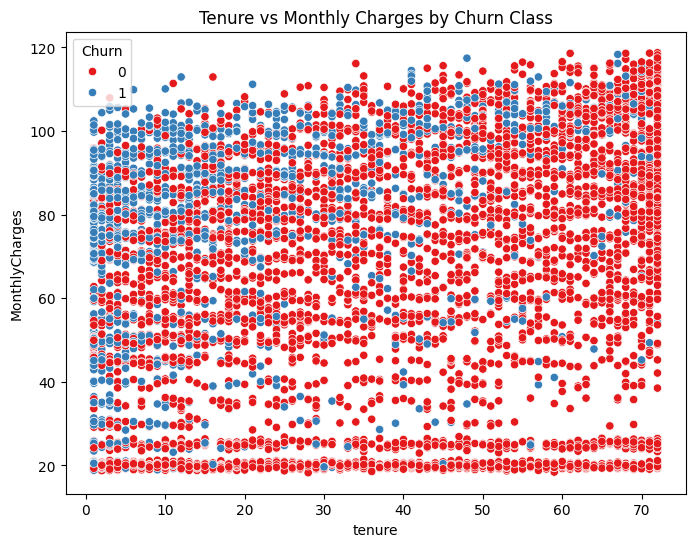

In [12]:
# check the separability of dataset
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df,
    x='tenure',
    y='MonthlyCharges',
    hue='Churn',
    palette='Set1'
)

plt.title('Tenure vs Monthly Charges by Churn Class')
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
plt.show()

The distribution of churn data based on Tenure and MonthlyCharges is really mixed and quite difficult to be separated in the linear form. Having seen this visualization, I prefer not to choose linear models in separating of Churn label.

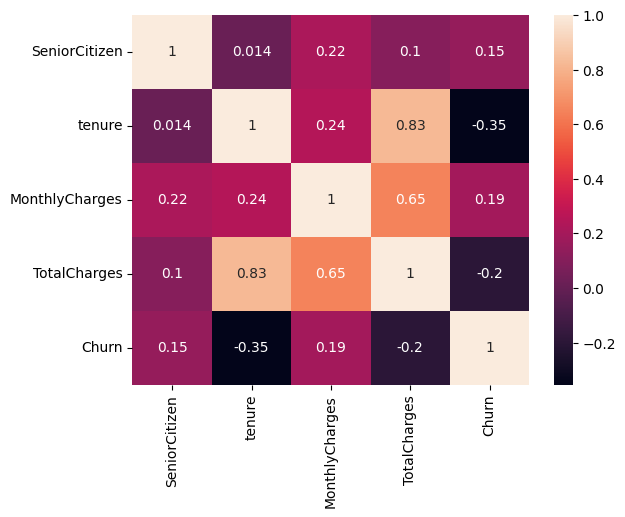

In [13]:
# check the correlation
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

We see multicolinearity case in the data, specifically between MonthlyCharges and tenure to TotalCharges. 

In this project, I probably will use boosting models, because of their capability that able to be more robust towards multicolienarity case, so I will keep those features in my dataset.

I think that's enough for the exploration, let's jump into the preprocessing step.

In [14]:
# save processed cleaned data to be used in modeling process
df.to_csv(config.PROCESSED_PATH)
print(f'Cleaned data has already saved to: {config.PROCESSED_PATH}')

Cleaned data has already saved to: data/processed/cleaned.csv
